In [2]:
%matplotlib inline

# Linear Regression

Linear regression is a modelling method that attempts to describe the relationship between two variables. 

Let's break this definition down a bit. An important concept to understand is regression analysis. Regression models estimate the strength of the relationship among variables.

A very simple way to think of linear regression, is you're finding the exact line of best fit.

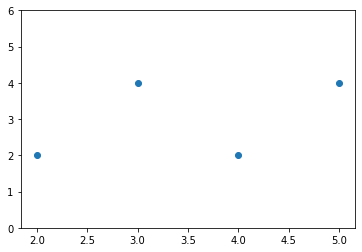

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = [2, 3, 4, 5]
y = [2, 4, 2, 4]

fig, ax = plt.subplots()
ax.set_ylim(bottom=0, top=6)
ax.scatter(x, y)

Fitting a line of best fit to this is pretty trivial

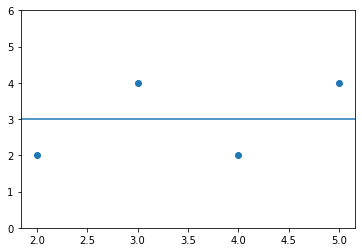

In [4]:
ax.axhline(3)
fig

Let's try another example

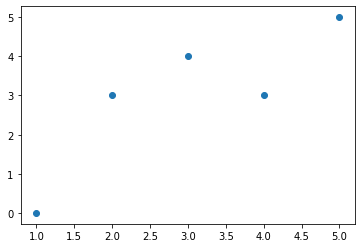

In [5]:
x = [1, 2, 3, 4, 5]
y = [0, 3, 4, 3, 5]

fig, ax = plt.subplots()
ax.scatter(x, y)

A little less obvious this time

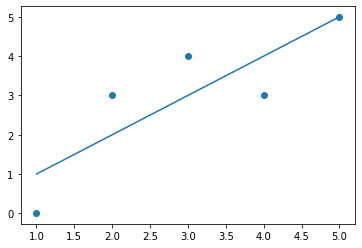

In [6]:
ax.plot(x, x)
fig

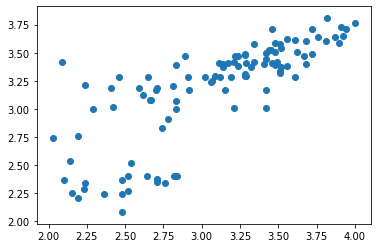

In [7]:
fig, ax = plt.subplots()

x = [3.45, 2.78, 2.52, 3.67, 3.24, 2.1, 2.82, 2.36, 2.42, 3.51, 3.48, 2.14, 2.59, 3.46, 3.51, 3.68, 3.91, 3.72, 2.15, 2.48, 3.09, 2.71, 2.46, 3.32, 3.61, 3.82, 2.64, 2.19, 3.34, 3.48, 3.56, 3.81, 3.92, 4, 2.52, 2.71, 3.15, 3.22, 2.29, 2.03, 3.14, 3.52, 2.91, 2.83, 2.65, 2.41, 2.54, 2.66, 3.21, 3.34, 3.68, 2.84, 2.74, 2.71, 2.24, 2.48, 3.14, 2.83, 3.44, 2.89, 2.67, 3.24, 3.29, 3.87, 3.94, 3.42, 3.52, 2.24, 3.29, 3.41, 3.56, 3.61, 3.28, 3.21, 3.48, 3.62, 2.92, 2.81, 3.11, 3.28, 2.7, 2.62, 3.72, 3.42, 3.51, 3.28, 3.42, 3.9, 3.12, 2.83, 2.09, 3.17, 3.28, 3.02, 3.42, 3.06, 2.76, 3.19, 2.23, 2.48, 3.76, 3.49, 3.07, 2.19, 3.46]
y = [3.52, 2.91, 2.4, 3.47, 3.47, 2.37, 2.4, 2.24, 3.02, 3.32, 3.59, 2.54, 3.19, 3.71, 3.58, 3.4, 3.73, 3.49, 2.25, 2.37, 3.29, 3.19, 3.28, 3.37, 3.61, 3.81, 2.4, 2.21, 3.58, 3.51, 3.62, 3.6, 3.65, 3.76, 2.27, 2.35, 3.17, 3.47, 3, 2.74, 3.37, 3.54, 3.28, 3.39, 3.28, 3.19, 2.52, 3.08, 3.01, 3.42, 3.6, 2.4, 2.83, 2.38, 3.21, 2.24, 3.4, 3.07, 3.52, 3.47, 3.08, 3.38, 3.41, 3.64, 3.71, 3.01, 3.37, 2.34, 3.29, 3.4, 3.38, 3.28, 3.31, 3.42, 3.39, 3.51, 3.17, 3.2, 3.41, 3.29, 3.17, 3.12, 3.71, 3.5, 3.34, 3.48, 3.44, 3.59, 3.28, 3, 3.42, 3.41, 3.49, 3.28, 3.17, 3.24, 2.34, 3.28, 2.29, 2.08, 3.64, 3.42, 3.25, 2.76, 3.41]
ax.scatter(x, y)

Much harder to determine the best line.

Let's take a moment and explore what the line of best fit actually means.

## Line of Best Fit

A line of best fit is a straight line that best represents data on a scatter plot.

This seems like a pretty intutive definition, but whenever you see the words, "best represents data", there is a mountain of ambiguity. In this case, how do we determine which line best represents the data.

There are many ways to estimate this line of best fit. These are called cost functions.

* Mean Squared Error
* Maximum Likelihood Estimation
* Ridge Regression
* And many many more

We'll take a look at Mean Squared Error (MSE) as it is by far the most commonly use cost function.

### Mean Squared Error

Mean squared error essentially measures how wrong the current estimation of line of best fit is.


![MSE](https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/Linear_least_squares_example2.png/440px-Linear_least_squares_example2.png)

#### Formula

$\frac{1}{2n}\Sigma{(Y - \hat{Y})^2}$

* n is the number of points in the training data
* $\frac{1}{n}\Sigma{}$ is the definition of MEAN, ignore the $\frac{1}{2}$ for now
* $\hat{Y}$ is the predicted y values, hypothesis, more on this later
* $Y$ the observed y values, given by the training set
* $Y - \hat{Y}$ is the ERROR, which gets squared
* So you have the MEAN SQUARED ERROR

The theory behind MSE is that big mistakes are punished much more than small mistakes. If you are 2 units away, than your error score is 4, while if you are 20 units off, then your score is 400.



In [8]:
def mean_squared_error(predicted_y, y):
    error = 0
    # Sum the error    
    for i in range(len(y)):
        error += y[i] - predicted_y[i]
    # Square the error    
    error = error**2
    # Mean    
    MSE = (1.0*error)/(2.0*float(len(y)))
    return MSE

def numpy_mean_squared_error(predicted_y, y):
    return (np.square(np.subtract(y, predicted_y)).mean())/2.0

### Prediction

The prediction is essentailly the line of best fit, so when you go to predict a new data point, it will fall on the line. Because it is a straight linear line the equation is akin to $y = mx + b$ sometimes also seen in the form $hypothesis = \theta_0 x + \theta_1$. Where the $hypothesis$ is the predicted variable, $x$ is the input variable, $\theta_0$ is the slope, $\theta_1$ is the bias term.

The slope/weight term is intutitively the correlation between the input value in relation to the target variable.

The bias term isn't as intutitive to understand. Essentially the data might not support a line of best fit through the origin. The bias term allows for the line to travel up and down the y-axis.

In [9]:
def hypothesis(weight, x, bias):
    return weight*x + bias

def hypothesis_numpy(weight, x, bias):
    return np.dot(weight, x) + bias    

Now how do we do this 

![grad desc](./lin-reg.gif "lin reg")

This is where we employ some very simple calculus with a technique called gradient descent.

## Gradient Descent

Let's take a moment to step back and realize what we want:

We want an equation for a straight line that represents the data by minimizing the error function.

Now whenever I hear the word "minimize", I get a flashblack to highschool calculus. If we remember back, when we want to minimize something, we are looking to find the global minima. Now if we remember back, local minimas occur at critical points, or when the derivative of the function is 0 or doesn't exist. Oh yeah, gradient is just a fancy name for a derivative with multiple variables.



So we need the derivative of the function that we're trying to minimize, the cost function. In this case the MSE. 

$MSE = \frac{1}{2n}\Sigma{(Y - \hat{Y})^2}$ can be rewritten as $MSE = \frac{1}{2n}\Sigma{(Y - (\theta_0 x + \theta_1))^2}$

So we'll have to take 2 partial derivatives. This is where that $\frac{1}{2}$ term comes in handy.

$\frac{\partial MSE}{\partial \theta_0} = -\frac{1}{n}\Sigma{x(y - (\theta_0 x + \theta_1))}$

$\frac{\partial MSE}{\partial \theta_0} = -\frac{1}{n}\Sigma{(y - (\theta_0 x + \theta_1))}$

Now to update the the variables we just up travel along the gradients downwards.

$\theta_0 = \theta_0 - \alpha\frac{\partial MSE}{\partial \theta_0}$

$\theta_1 = \theta_1 - \alpha\frac{\partial MSE}{\partial \theta_1}$

Looking at the name, 

*Gradient* means the rate of inclination of declination of a slope

*Descent* means descending... duh

The name actually fairly intuitively describes what we're going to do.

### Learning rate

$\alpha$ is the learning rate. The learning rate is the size of steps taken in  gradient descent, each x illustrates a step. A high learning rate  takes very large steps, but we may over shoot the minima. A low learning rate takes very small steps, while very percise it can be extremely time consuming. Your learning rate will probably take some fine tuning to fit the projects needs.

![grad desc learning rate](https://ml-cheatsheet.readthedocs.io/en/latest/_images/gradient_descent_demystified.png)


### Epochs

An epoch is the number of times to run the algorithm over the training data. Generally you want to run you to run over the data multiple times, this is because of underfitting/overfitting. If you run over the data once, the weight and bias terms may not fit the data well enough to capture the trend. Overfitting occurs if you iterate over the data too much such that it learns the exact data too well and the noise/random flucations in the training data negatively effects the performance when exposed to new data. As is a common trend  in machine learning, you'll have to experiment to find the right number of iterations for your data.

In [10]:
def dMSE(x, y, weight, bias):
    dTheta_0 = 0
    dTheta_1 = 0
    
    for i in range(len(y)):
        
        # -x(y - (Theta_0*x + Theta_1))
        dTheta_0 += -1*x[i](y[i] - hypothesis(weight, x[i], bias))
        
        # -(y - (Theta_0*x + Theta_1))
        dTheta_1 += -1*(y[i] - hypothesis(weight, x[i], bias))
        
    return dTheta_0, dTheta_1
    
def update_weights(x, y, weight, bias, learning_rate):
    weight_deriv, bias_deriv = dMSE(x, y, weight, bias)

    weight -= weight_deriv/len(y) * learning_rate
    bias -= bias_deriv/len(y) * learning_rate

    return weight, bias
    
def grad_desc(x, y, weight, bias, learning_rate=0.01, epochs=1000):
    
    for i in range(epochs):
        weight, bias = update_weights(x, y, weight, bias, learning_rate)

And viola we're done!

### Stochastic Gradient Descent

Well not really... Datasets can be monstrously large, containing millions or even billions of records. Looping through can calculating the error for each datapoint could be totally infeasible, especially if you want to iterate over the dataset many times. 

To examplify this, let's say we have a dataset with 100,000 records, each record has 100 features. Each iteration of gradient descent will calculate the sum of squared error for each datapoint, so 100,000 times. But let's not forget, we are calculating the derivative for each feature, so in reality we are doing 100,000 * 100 computations, 100,000,000 for each epoch. It's common to have at least 1000 epochs, so to compelete the algorithm it will require 100,000,000,000, or 100 billion computations. This can be quite burdensome.

Well, let's think about what we can do. Linear regression is a feedback system, get feedback (check error), make changes (update weights), repeat. Let's examine a real world feedback activity and see if we can grab any insights that we can adopt. Writing, does a writer publish their work without having anyone read it? No. Neither do they ask everyone to read it and give feedback. They typically ask someone to review it, give feedback, make changes, and submit another revision.

Stochastic is really just a fancy word for random. In this case it essentially means random sampling. Instead of using every single datapoint for each epoch, we pick a random datapoint.  In pure implementation each epoch will pick a single random datapoint, compute the error, update the weights, and go to the next iteration. However when looking at random sampling in practice, scientists won't use a single person for their study, political polling doesn't ask a single person who their voting for, they choose a sample size of greater than 1 and less than the total population.

This is called mini-batch stochastic gradient descent. The theory behind this and other instances of random sampling is that a random subset of the population will fairly represent the total population, at least within an acceptable margin of error.